# Supervised Learning for Fraud Detection

In this video, we will walk through a comprehensive process of applying supervised machine learning alogrithms using real-life data. We will train test and evaluate the following algorithms:

1. Logistic Regression
2. Decision Trees
3. Naive Bayes Classifier



# Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Import the dataset

In [2]:
# Load data into pandas DataFrame
df = pd.read_csv('C:/Users/Amarkou/Documents/Ecourse/creditcard.csv')
# Select the first 30,000 rows of the DataFrame
df = df.head(60000)

# Print the shape of the sampled DataFrame
print(df)

          Time        V1        V2        V3        V4        V5        V6  \
0          0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...        ...       ...       ...       ...       ...       ...       ...   
59995  49104.0 -1.179821 -0.409590  1.193034 -0.857986 -0.994028  0.013890   
59996  49104.0  1.017824  0.030460  0.592427  1.037257 -0.155280  0.291684   
59997  49104.0  1.019115 -0.332555  1.453262  1.196906 -1.215788  0.327464   
59998  49104.0  1.149634  0.144853  0.349882  0.591884 -0.360690 -0.428566   
59999  49105.0 -2.154248  1.552585 -0.495473  0.143035 -0.736862  0.692048   

             V7        V8        V9  ...       V21       V22   

# Supervised Learning Modelling Process

## Split data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)

## Define hyperparameters to tune for each algorithm

In [4]:
lr_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20]}
nb_params = {}
#svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
#nn_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'logistic'], 'solver': ['adam', 'sgd'], 'alpha': [0.0001, 0.001, 0.01]}

## Train and Test the models

In [5]:
# Logistic regression
lr = LogisticRegression(max_iter=1000)
lr_gs = GridSearchCV(lr, lr_params, scoring='roc_auc', cv=5)
lr_gs.fit(X_train, y_train)
lr_preds = lr_gs.predict(X_test)

# Decision trees
dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, dt_params, scoring='roc_auc', cv=5)
dt_gs.fit(X_train, y_train)
dt_preds = dt_gs.predict(X_test)

# Naive Bayes
nb = GaussianNB()
nb_gs = GridSearchCV(nb, nb_params, scoring='roc_auc', cv=5)
nb_gs.fit(X_train, y_train)
nb_preds = nb_gs.predict(X_test)

# SVM
#svm = SVC(probability=True,max_iter=1000)
#svm_gs = GridSearchCV(svm, svm_params, scoring='roc_auc', cv=5)
#svm_gs.fit(X_train, y_train)
#svm_preds = svm_gs.predict(X_test)

# Neural Networks
#nn = MLPClassifier(max_iter=1000)
#nn_gs = GridSearchCV(nn, nn_params, scoring='roc_auc', cv=5)
#nn_gs.fit(X_train, y_train)
#nn_preds = nn_gs.predict(X_test)

## Evaluation of algorithms

In [6]:
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Precision:", precision_score(y_test, lr_preds))
print("Recall:", recall_score(y_test, lr_preds))
print("F1 Score:", f1_score(y_test, lr_preds))
print("AUC Score:", roc_auc_score(y_test, lr_preds))
print("\n")

print("Decision Trees Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Precision:", precision_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))
print("F1 Score:", f1_score(y_test, dt_preds))
print("AUC Score:", roc_auc_score(y_test, dt_preds))
print("\n")

print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Precision:", precision_score(y_test, nb_preds))
print("Recall:", recall_score(y_test, nb_preds))
print("F1 Score:", f1_score(y_test, nb_preds))
print("AUC Score:", roc_auc_score(y_test, nb_preds))
print("\n")

#print("SVM Metrics:")
#print("Accuracy:", accuracy_score(y_test, svm_preds))
#print("Precision:", precision_score(y_test, svm_preds))
#print("Recall:", recall_score(y_test, svm_preds))
#print("F1 Score:", f1_score(y_test, svm_preds))
#print("AUC Score:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))
#print("\n")

#print("Neural Networks Metrics:")
#print("Accuracy:", accuracy_score(y_test, nn_preds))
#print("Precision:", precision_score(y_test, nn_preds))
#print("Recall:", recall_score(y_test, nn_preds))
#print("F1 Score:", f1_score(y_test, nn_preds))
#print("AUC Score:", roc_auc_score(y_test, nn.predict_proba(X_test)[:, 1]))
#print("\n")

Logistic Regression Metrics:
Accuracy: 0.9981666666666666
Precision: 0.8611111111111112
Recall: 0.5254237288135594
F1 Score: 0.6526315789473686
AUC Score: 0.7625725187738718


Decision Trees Metrics:
Accuracy: 0.9990555555555556
Precision: 0.9565217391304348
Recall: 0.7457627118644068
F1 Score: 0.8380952380952381
AUC Score: 0.8728256176790402


Naive Bayes Metrics:
Accuracy: 0.985
Precision: 0.1607717041800643
Recall: 0.847457627118644
F1 Score: 0.2702702702702703
AUC Score: 0.9164549715215315




## ROC Curve graph

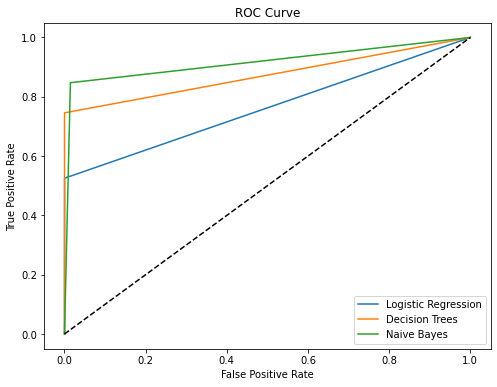

In [7]:
# Evaluation of algorithms (continued)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_preds)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_preds)
#fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_preds)
#fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, nn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Trees')
#plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
#plt.plot(fpr_nn, tpr_nn, label='Neural Networks')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()